In [1]:
import glob

import xarray as xr
import xcdat as xc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
agcd_files = sorted(glob.glob('/g/data/xv83/agcd-csiro/dailyExposure/daily/dailyExposure_AGCD-CSIRO_r005_*_daily.nc'))

In [3]:
agcd_ds = xc.open_mfdataset(agcd_files)

In [4]:
agcd_ds

<xarray.Dataset>
Dimensions:         (longitude: 839, latitude: 679, time: 12339, bnds: 2)
Coordinates:
  * longitude       (longitude) float64 112.1 112.1 112.2 ... 153.9 153.9 154.0
  * latitude        (latitude) float64 -10.05 -10.1 -10.15 ... -43.9 -43.95
  * time            (time) object 1990-01-01 00:00:00 ... 2023-10-30 00:00:00
Dimensions without coordinates: bnds
Data variables:
    date            (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>
    dailyExposure   (time, latitude, longitude) float64 dask.array<chunksize=(365, 679, 839), meta=np.ndarray>
    longitude_bnds  (longitude, bnds) float64 112.0 112.1 112.1 ... 153.9 154.0
    latitude_bnds   (latitude, bnds) float64 -10.03 -10.08 ... -43.93 -43.98
    time_bnds       (time, bnds) object 1989-12-31 12:00:00 ... 2023-10-30 12...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.4
    history:      Tue Sep 03 15:38:59 2019: cdo -O -k auto -z zip_4 -f nc4c m...
    title:        Solar radiation product produced from satellite GMS4 by Aus...
    version:      Version 2011-07-01
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...

In [5]:
awra_files = sorted(glob.glob('/g/data/fj8/BoM/AWRA/DATA/CLIMATE/solar_exposure_day/solar_exposure_day_*.nc'))

In [6]:
awra_ds = xc.open_mfdataset(awra_files)

In [7]:
awra_ds

<xarray.Dataset>
Dimensions:             (time: 12368, latitude: 681, longitude: 841, bnds: 2)
Coordinates:
  * time                (time) object 1990-01-01 00:00:00 ... 2023-11-11 00:0...
  * latitude            (latitude) float64 -10.0 -10.05 -10.1 ... -43.95 -44.0
  * longitude           (longitude) float64 112.0 112.0 112.1 ... 153.9 154.0
Dimensions without coordinates: bnds
Data variables:
    solar_exposure_day  (time, latitude, longitude) float32 dask.array<chunksize=(365, 681, 841), meta=np.ndarray>
    longitude_bnds      (longitude, bnds) float64 112.0 112.0 ... 154.0 154.0
    latitude_bnds       (latitude, bnds) float64 -9.975 -10.03 ... -43.98 -44.02
    time_bnds           (time, bnds) object 1989-12-31 12:00:00 ... 2023-11-1...
Attributes:
    var_name:       solar_exposure_day
    source:         AWRA-L-v5
    date_created:   2018-07-11T01:04:55
    institution:    Bureau of Meteorology
    email:          awrams@bom.gov.au
    url:            http://www.bom.gov.au/water/landscape
    Conventions:    CF-1.6, ACDD-1.3
    date_modified:  2018-07-11T01:04:55
    summary:        Data produced by Bureau of Meteorology Australian Water R...
    title:          Australian Landscape Water Balance AWRA-L Model Version 5

In [23]:
point_awra = awra_ds.sel({'latitude': -20, 'longitude': 130})

In [24]:
point_awra = point_awra.compute()

In [19]:
point_agcd = agcd_ds.sel({'latitude': -20, 'longitude': 130})

In [21]:
point_agcd = point_agcd.compute()

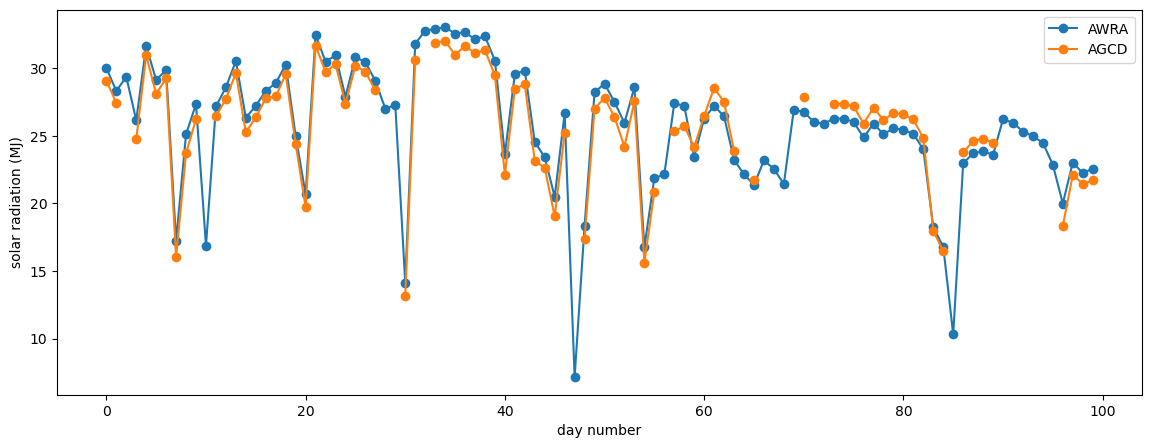

In [26]:
fig = plt.figure(figsize=[14,5])
day = np.arange(0, 100)
plt.plot(day, point_awra['solar_exposure_day'][0:100].values, marker='o', label='AWRA')
plt.plot(day, point_agcd['dailyExposure'][0:100].values, marker='o', label='AGCD')
plt.ylabel('solar radiation (MJ)')
plt.xlabel('day number')
plt.legend()
plt.show()

In [27]:
agcd_clim = point_agcd.temporal.climatology("dailyExposure", freq="day", weighted=True)

In [28]:
agcd_clim = agcd_clim.compute()

In [29]:
agcd_clim

<xarray.Dataset>
Dimensions:         (bnds: 2, time: 365)
Coordinates:
    longitude       float64 130.0
    latitude        float64 -20.0
  * time            (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (bnds) float64 130.0 130.0
    latitude_bnds   (bnds) float64 -19.98 -20.02
    dailyExposure   (time) float64 26.43 26.8 25.62 26.6 ... 27.12 26.51 27.03
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.4
    history:      Tue Sep 03 15:38:59 2019: cdo -O -k auto -z zip_4 -f nc4c m...
    title:        Solar radiation product produced from satellite GMS4 by Aus...
    version:      Version 2011-07-01
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...

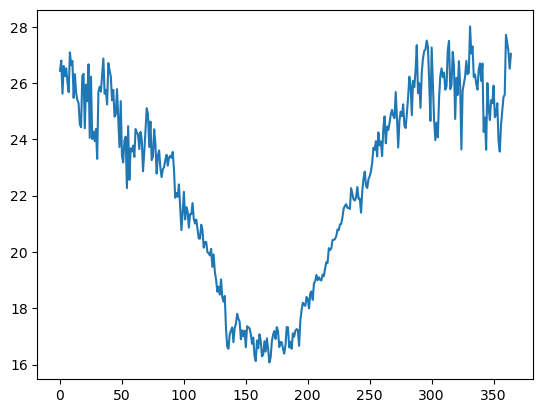

In [42]:
plt.plot(agcd_clim['dailyExposure'].values)

In [30]:
point_agcd_1990 = point_agcd.sel(time=point_agcd['time'].dt.year == 1990)

In [31]:
point_agcd_1990

<xarray.Dataset>
Dimensions:         (time: 365, bnds: 2)
Coordinates:
    longitude       float64 130.0
    latitude        float64 -20.0
  * time            (time) object 1990-01-01 00:00:00 ... 1990-12-31 00:00:00
Dimensions without coordinates: bnds
Data variables:
    date            (time) float64 1.99e+07 1.99e+07 ... 1.99e+07 1.99e+07
    dailyExposure   (time) float64 29.07 27.43 nan 24.74 ... 29.82 28.74 28.49
    longitude_bnds  (bnds) float64 130.0 130.0
    latitude_bnds   (bnds) float64 -19.98 -20.02
    time_bnds       (time, bnds) object 1989-12-31 12:00:00 ... 1990-12-31 12...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.4
    history:      Tue Sep 03 15:38:59 2019: cdo -O -k auto -z zip_4 -f nc4c m...
    title:        Solar radiation product produced from satellite GMS4 by Aus...
    version:      Version 2011-07-01
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...

In [33]:
fixed_1990 = point_agcd_1990['dailyExposure'].fillna(agcd_clim['dailyExposure'].values)

In [35]:
fixed_1990[0:10]

<xarray.DataArray 'dailyExposure' (time: 10)>
array([29.07357868, 27.43075923, 25.61895561, 24.73640442, 30.96022355,
       28.07899475, 29.26355663, 16.02888007, 23.71614557, 26.22235348])
Coordinates:
    longitude  float64 130.0
    latitude   float64 -20.0
  * time       (time) object 1990-01-01 00:00:00 ... 1990-01-10 00:00:00
Attributes:
    long_name:  Daily total horizontal solar exposure at surface
    units:      megajoule/meter2

In [36]:
point_agcd_1990['dailyExposure'][0:10]

<xarray.DataArray 'dailyExposure' (time: 10)>
array([29.07357868, 27.43075923,         nan, 24.73640442, 30.96022355,
       28.07899475, 29.26355663, 16.02888007, 23.71614557, 26.22235348])
Coordinates:
    longitude  float64 130.0
    latitude   float64 -20.0
  * time       (time) object 1990-01-01 00:00:00 ... 1990-01-10 00:00:00
Attributes:
    long_name:  Daily total horizontal solar exposure at surface
    units:      megajoule/meter2

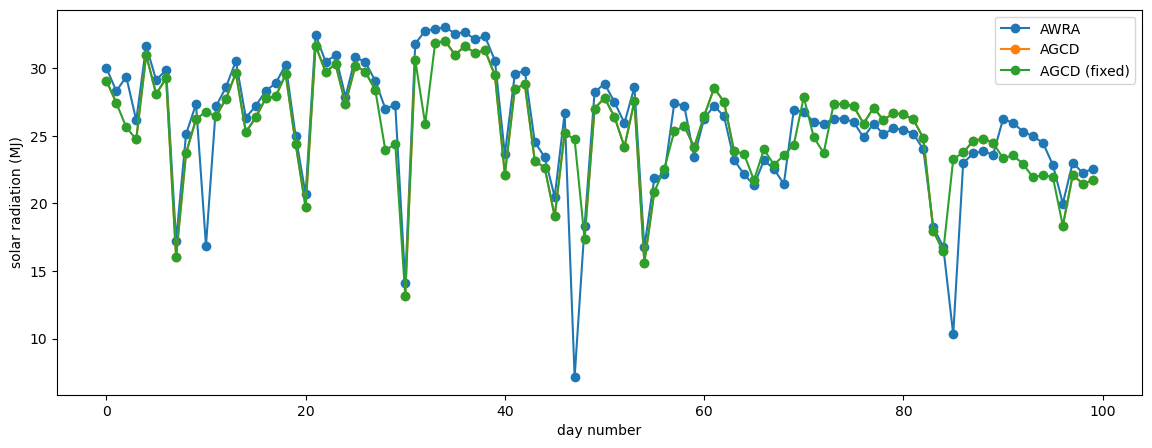

In [40]:
fig = plt.figure(figsize=[14,5])
day = np.arange(0, 100)
plt.plot(day, point_awra['solar_exposure_day'][0:100].values, marker='o', label='AWRA')
plt.plot(day, point_agcd['dailyExposure'][0:100].values, marker='o', label='AGCD')
plt.plot(day, fixed_1990[0:100].values, marker='o', label='AGCD (fixed)')
plt.ylabel('solar radiation (MJ)')
plt.xlabel('day number')
plt.legend()
plt.show()